<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/PSO_cv04_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 - Intensity Histogram and Intensity Modification

In this lab we will work with grayscale images and their histograms. We will modify intensities of images to obtain better contrast and perform thresholding.

We will first download some images.

In [ ]:
!wget https://digitalmedia.fws.gov/digital/api/singleitem/image/natdiglib/8687/default.jpg
!mv default.jpg building.jpg
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png

!ls

--2023-10-01 13:06:56--  https://digitalmedia.fws.gov/digital/api/singleitem/image/natdiglib/8687/default.jpg
Resolving digitalmedia.fws.gov (digitalmedia.fws.gov)... 132.174.1.251
Connecting to digitalmedia.fws.gov (digitalmedia.fws.gov)|132.174.1.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘default.jpg’

default.jpg             [ <=>                ]  55.92K  --.-KB/s    in 0.09s   

2023-10-01 13:06:56 (650 KB/s) - ‘default.jpg’ saved [57259]

--2023-10-01 13:06:56--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403462 (1.3M) [image/png]
Saving to: ‘landscape_dull.png.1’

landscape_dull.png. 100%[===

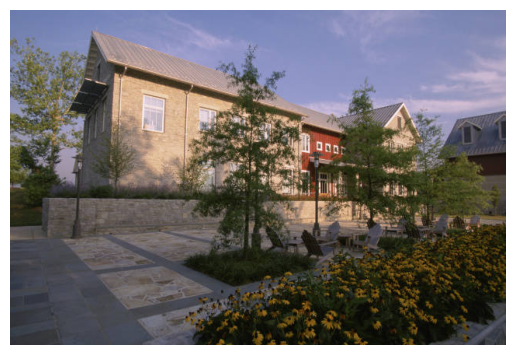

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread('building.jpg')
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

## Histogram

We will now create a histogram of our image. We simply take the intensity values of the pixels and calculate the histogram. There are multiple ways how to do it. We can obtain the histogram using NumPy, OpenCV or directly plot it in matplotlib.


Keep in mind that you have to convert the image to grayscale first.

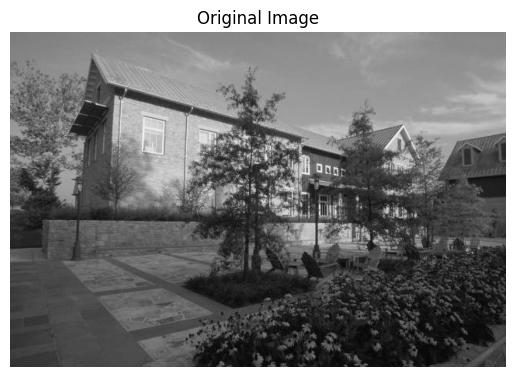

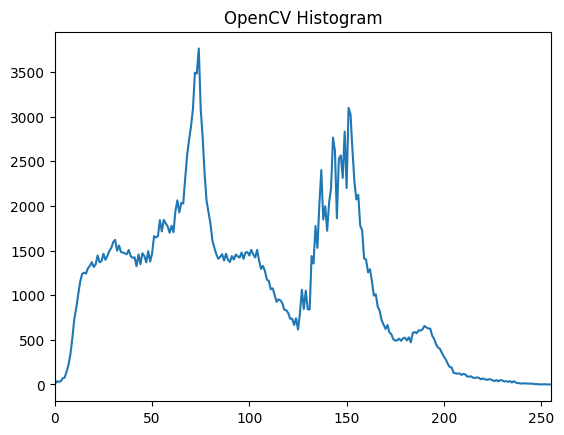

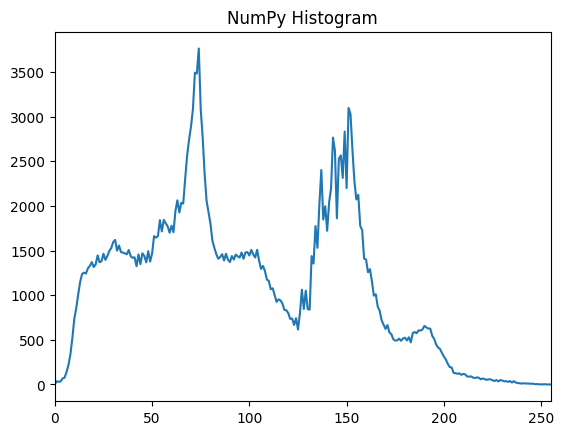

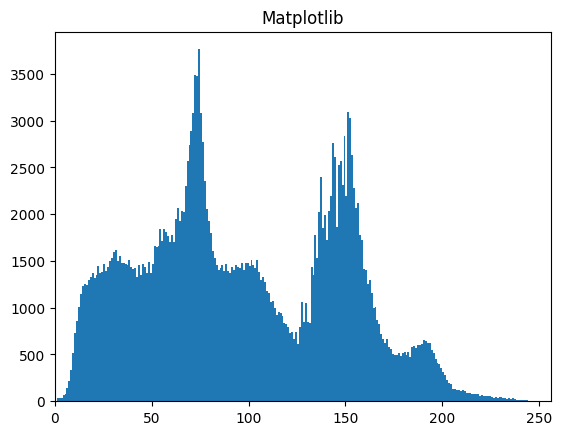

In [ ]:
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


hist = cv2.calcHist([img_g],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('OpenCV Histogram')
plt.xlim([0, 255])
plt.show()


hist,bins = np.histogram(img_g.ravel(),256,[0,256])
plt.plot(hist)
plt.title('NumPy Histogram')
plt.xlim([0, 255])
plt.show()


plt.hist(img_g.ravel(), 256,[0,256])
plt.title('Matplotlib')
plt.xlim([0, 256])
plt.show()


## Exercise 1 - Color Histogram

We have produced a histogram for the grayscale image. Now try to produce a plot which contains the histograms for the three different channels. Make the colors of the plot lines correspond to the channel color (BGR).

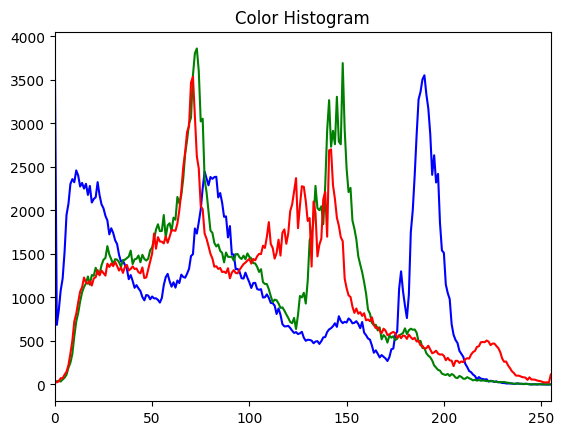

In [ ]:
...

## Exercise 2 - Histogram masking

You can notice that there are three peaks in the grayscale histogram. Try to modify the image so that pixels from one of the three peaks are all completely white.

For two of the peaks you can simply use logical indexing with common operators. If you want to obtain the middle peak you could find the [NumPy logical operators](https://numpy.org/doc/stable/reference/routines.logic.html#logical-operations) useful.

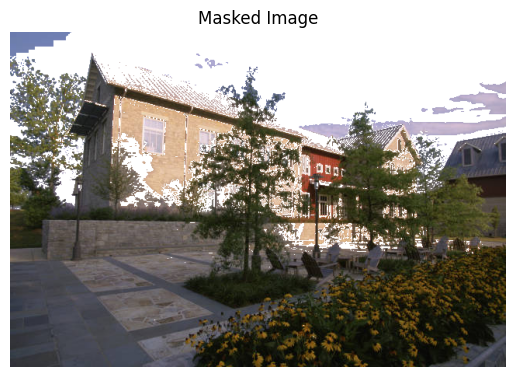

In [ ]:
...

## Exercise 3 - Intensity Transformations

Sometimes we want to modify an image to obain better contrast. We can do this in various ways. Two simple methods are based on modification of individual pixels. Let $I$ be a grayscale image and $I_{i, j}$ a single pixel. Let the output image be $O$ with $O_{i, j}$ being a single pixel. We can modify the grayscale intensity in a linear manner:

$$O_{i, j} = \frac{I_{i, j} - \min(I)}{\max(I) - \min(I)}$$

Another method is gamma correction. We now assume that $I$ is in the range from 0 to 1 (in floats).

$$O_{i, j} = I_{i, j}^{\frac{1}{G}},$$

where $G$ is the gamma factor.

Implement both of these methods into the function definitions provided below.

In [ ]:
def linear_intensity_transform(img):
  ...

def gamma_transform(img, G):
  ...

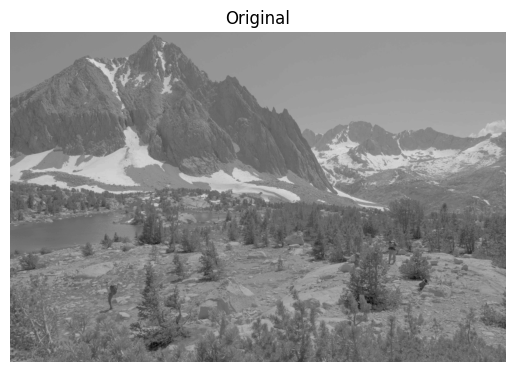

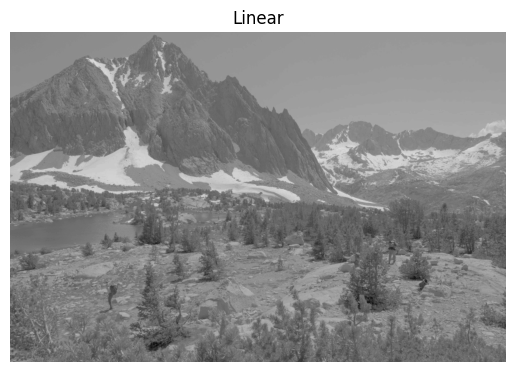

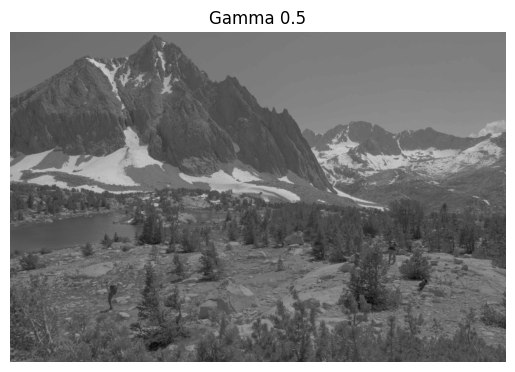

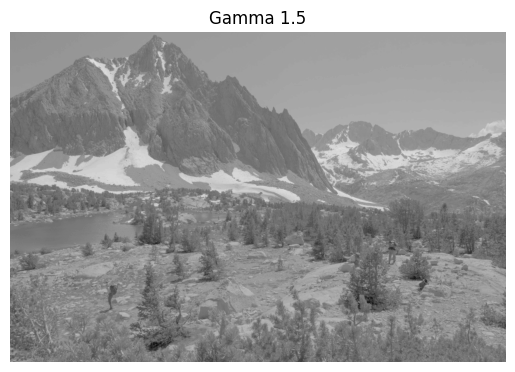

In [ ]:
img_landscape = cv2.cvtColor(cv2.imread('landscape_dull.png'), cv2.COLOR_BGR2GRAY)

plt.imshow(img_landscape, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.show()


plt.imshow(linear_intensity_transform(img_landscape), cmap='gray')
plt.axis('off')
plt.title('Linear')
plt.show()


plt.imshow(gamma_transform(img_landscape, 0.5), cmap='gray')
plt.axis('off')
plt.title('Gamma 0.5')
plt.show()


plt.imshow(gamma_transform(img_landscape, 1.5), cmap='gray')
plt.axis('off')
plt.title('Gamma 1.5')
plt.show()

## Histogram Equalization

We can also perform a more sophisticated transformation, more specifically [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization). This can be performed using OpenCV function [`equalizeHist`](https://docs.opencv.org/4.8.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e).

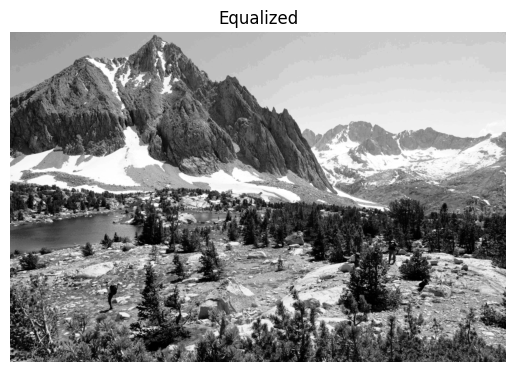

In [ ]:
img_landscape = cv2.cvtColor(cv2.imread('landscape_dull.png'), cv2.COLOR_BGR2GRAY)
img_landscape_eq = cv2.equalizeHist(img_landscape)

plt.imshow(img_landscape_eq, cmap='gray')
plt.title('Equalized')
plt.axis('off')
plt.show()

## Exercise 4 - Histograms for the methods

Plot all of the histograms for the three different methods.

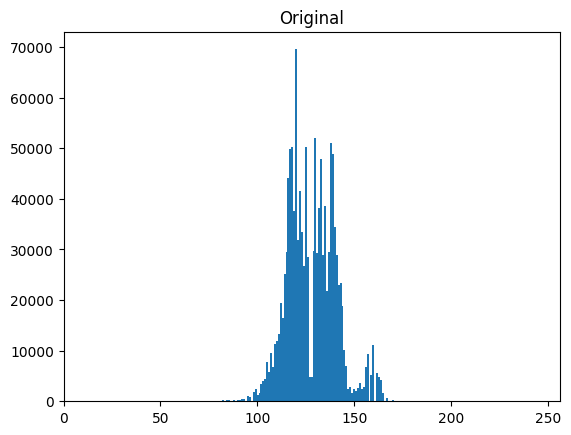

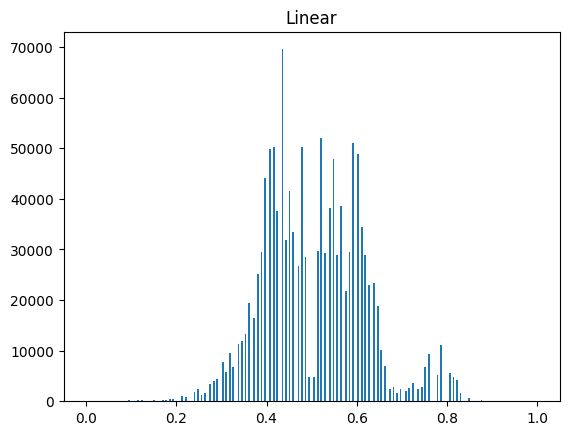

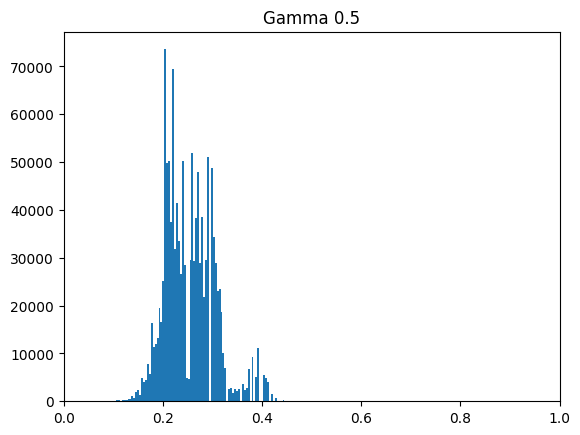

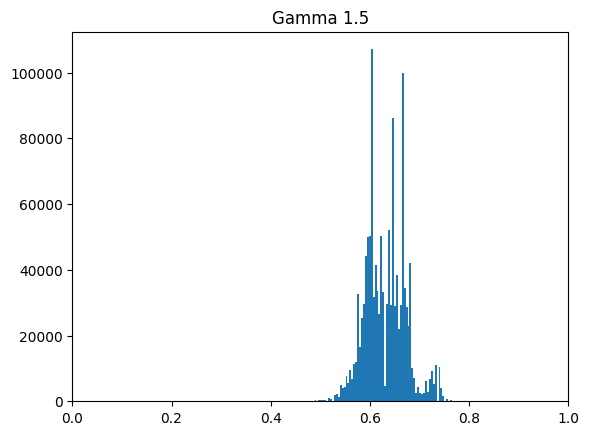

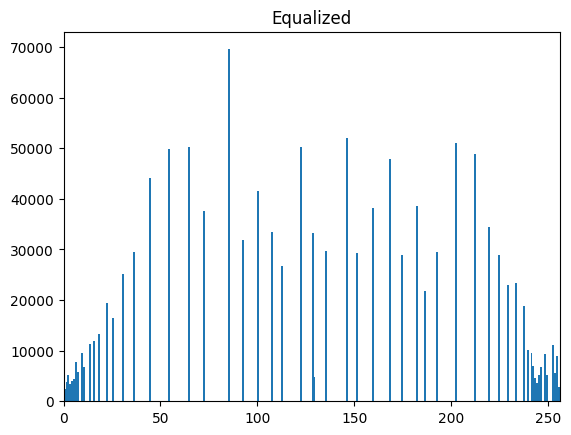

In [ ]:
...